# Estymatory największej wiarygodności

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from scipy import optimize

# Zadanie 1
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami $\mu=1$, $\sigma=1$. 

In [76]:
N = 100000
u=stats.uniform()
data = u.rvs(size=N)
mu= 0
sigma = 1
print(data)

[0.20111797 0.00875488 0.68521076 ... 0.7472631  0.94544199 0.53081158]


[0.02268713 0.01278516 0.11329133 ... 0.52227599 0.1725857  0.63175577]


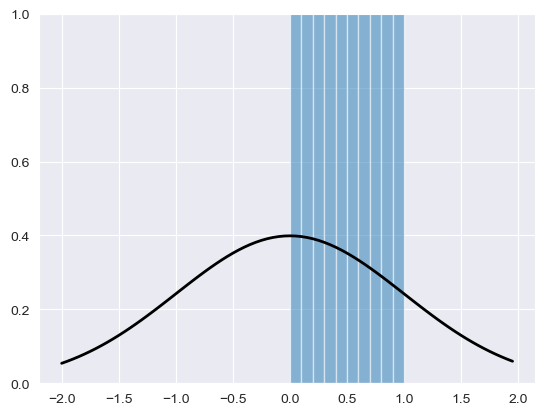

In [89]:
N = 100000
u=stats.uniform()
data2 = u.rvs(size=N)
mu= 0
sigma = 1
print(data2)
t = np.arange(-2, 2, 0.05)
num_bins = 50
plt.hist(data2, alpha=0.5, label='histogram')
plt.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
plt.ylim(0,1)
plt.show()

# Zadanie 2
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami 

<ul>
<li>$\mu=\frac{1}{n}\sum_{i=1}^n x_i$</li>
<li>$\sigma^2=\frac{1}{n} \sum_{i=1}^n(x_i - \mu)^2$</li>
</ul>

mu =  0.5002066678278332
sigma =  0.288769182320502


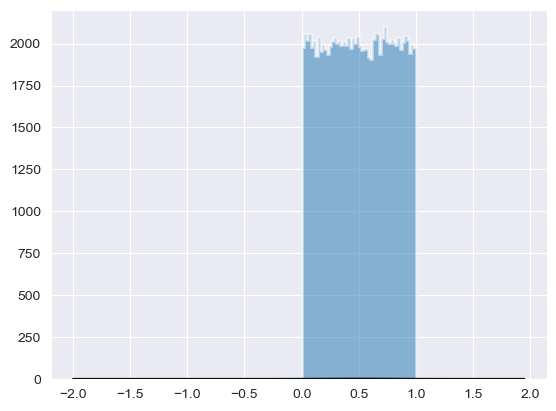

In [90]:
mu = (sum(data))/len(data)
sigma = np.sqrt((sum((data-mu)**2))/len(data))
print('mu = ',mu)
print('sigma = ',sigma)
plt.hist(data, histtype='stepfilled', lw=2, alpha=0.5, label='histogram', bins=num_bins)
plt.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
plt.show()

# Zadanie 3
Napisz program, który losuje próbkę z rozkładu jednostajnego i rysuje funkcję gęstości rozkładu normalnego z parametrami otrzymanymi za pomocą funkcji <tt>fit()</tt> ze <tt>scipy.stats</tt>

[0.16563625 0.37237064 0.63236592 ... 0.45064615 0.89627213 0.09673715]
mu =  0.4995425027580285
sigma =  0.2888364490273605


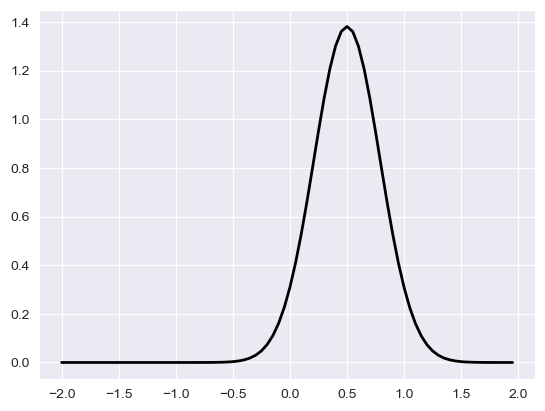

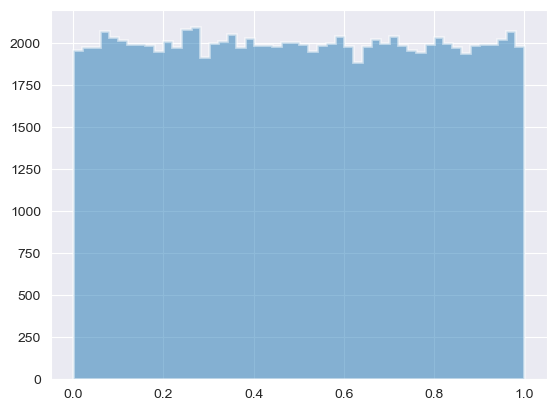

In [38]:
print(data)
mu, sigma = stats.norm.fit(data)
print('mu = ',mu)
print('sigma = ',sigma)
plt.plot(t, stats.norm.pdf(t,mu, sigma), 'k-', lw=2, label='a=-1, b=1')
plt.show()
plt.close()
plt.hist(data, histtype='stepfilled', lw=2, alpha=0.5, label='histogram', bins=num_bins)
plt.show()

# Zadanie 4

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma)=\prod_{i=1}^n f_{m,\sigma} (x_i).
$$


Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów normalnych:

$$
l(X,m,\sigma)=\ln\left( L(X,m,\sigma) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma} (x_i))
$$

In [39]:
# split normal distribution pdf
def Gpdf(x, mu, sigma):
    return 1/(sigma * (2*np.pi)**.5) *np.e ** (-(x-mu)**2/(2 * sigma**2))

In [56]:
def likelihood_foo(x, mu, sigma):
    return sum(np.log(Gpdf(x,mu,sigma)))
print(Gpdf(np.array([1,2,3,4,5]),mu, sigma))
print(likelihood_foo(np.array([1,2,3,4,5]),mu, sigma))

[8.76415025e-002 1.21716027e-012 2.34759768e-034 6.28836191e-067
 2.33931841e-110]
-512.1725031038527


# Zadanie 5
Policz MLE dla danych z rozkładu jednostajnego i parametrów:
<ul>
<li>$\mu=0$, $\sigma=1$</li>
<li>$\mu=0$, $\sigma=2$</li>
<li>$\mu=1$, $\sigma=1$</li>
<li>$\mu=0.5$, $\sigma=0.2$</li>
</ul>
Dla których wartości wychodzi wynik największy i dlaczego?

In [57]:
data = u.rvs(10000)
print(data)
for mu, sigma in zip([0,0,1,0.5],[1,2,1,0.2]):
    print(mu, sigma, Gpdf(data,mu, sigma), likelihood_foo(data, mu, sigma))

[0.40805348 0.06152345 0.4022899  ... 0.30048453 0.86858563 0.53887767]
0 1 [0.3670738  0.39818797 0.36793201 ... 0.38133234 0.27358059 0.34502683] -10882.86214708999
0 2 [0.19536236 0.19937678 0.19547645 ... 0.19723249 0.18151975 0.19236044] -16544.226341407026
1 1 [0.33482781 0.25683854 0.33368187 ... 0.31235982 0.3955123  0.35870483] -10837.236238313679
0.5 0.2 [1.79467211 0.18036518 1.77031692 ... 1.21278464 0.36506033 1.95737827] -3611.6027240836547


# Zadanie 6
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minimum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [6]:
def f(x):
    x1, x2 = x
    return (x1+1)**2+(x2)**2
x0 = np.asarray((0, 0))  # Initial guess.
res1 = optimize.fmin_cg(f, x0)
print(res1)

         Current function value: 0.000100
         Iterations: 1
         Function evaluations: 20
         Gradient evaluations: 2
[ -1.01000000e+00  -7.52508635e-09]


# Zadanie 7
Zminimalizuj funkcją wiarygodności z Zad. 5 (numerycznie).

Czy wyniki są podobne do wyniików z poprzednich zadań?

In [92]:
def likelihood_foo_Gpdf(x, *args):
    mu, sigma = args
    return sum(np.log(Gpdf(x,mu,sigma)))
x0 = np.asarray((0, 0))  # Initial guess.
args = (0,1)
res = optimize.fmin_cg(likelihood_foo_Gpdf, x0, args=args)
print(res)

Optimization terminated successfully.
         Current function value: -1.837877
         Iterations: 0
         Function evaluations: 3
         Gradient evaluations: 1
[0 0]


# Zadanie 8 (dla chętnych)
Wykonaj poprzednie zadanie wykorzystując pochodne http://faculty.washington.edu/ezivot/econ583/mleLectures.pdf.

# Zadanie 9
Napisz funkcję gęstości rozkładu Split Gaussian:

$$
SN(x;m,\sigma^2,\tau^2) = \left\{ \begin{array}{ll}
c \cdot \exp[-\frac{1}{2\sigma^2}(x-m)^2], & \textrm{for $x\leq m$},\\
c \cdot \exp[-\frac{1}{2\tau^2\sigma^2}(x-m)^2], & \textrm{for $x>m$},\\
\end{array} \right.
$$

gdzie $c=\sqrt{\frac{2}{\pi}}\sigma^{-1}(1+\tau)^{-1}$.

Narysuj gęstości dla parametrów:

<ul>
<li>$\mu=0$, $\sigma=1$, $\tau=1$</li>
<li>$\mu=0$, $\sigma=1$, $\tau=1/2$</li>
<li>$\mu=1$, $\sigma=1/2$, $\tau=1$</li>
</ul>

In [91]:
def SN(x, mu, sigma, tau):
    c = np.sqrt(2/np.pi)*sigma**-1*(1+tau)**-1
    return [c*np.exp(-(xi-mu)**2/(2*sigma**2)) if xi<=mu else c*np.exp(-(xi-mu)**2/(2*tau**2*sigma**2)) for xi in x]
print(SN(np.array([1,2,3]), 0,1,0.5))

[0.0719879553509174, 0.00017844030101984713, 8.101177133097714e-09]


# Zadanie 10

Wiemy, że funkcja wiarygodnosci ma postać:

$$
L(X,m,\sigma,\tau)=\prod_{i=1}^n f_{m,\sigma,\tau} (x_i).
$$

Zaimplementuj logarytmiczną funkcję wiarygodności  dla rodziny rozkładów Split Normal:

$$
l(X,m,\sigma,\tau)=\ln\left( L(X,m,\sigma,\tau) \right)=\ln\left(\prod_{i=1}^n f_{m,\sigma,\tau} (x_i) \right)=\sum_{i=1}^n \ln(f_{m,\sigma,\tau} (x_i))
$$

In [94]:
def likelihood_foo_SN(x, *args):
    mu, sigma, tau = args
    return sum(np.log(SN(x,mu,sigma, tau)))

# Zadanie 11
Zminimalizuj funkcją wiarygodności z Zad. 10 (numerycznie).

In [97]:
x0 = np.array([0,0])
args=np.array([0,1,0.5])
res = optimize.fmin_cg(likelihood_foo_SN, x0, args=args)
print(res)

         Current function value: -203.262513
         Iterations: 0
         Function evaluations: 330
         Gradient evaluations: 106
[10  1]


C:\Users\makso\AppData\Local\Temp\ipykernel_12496\3516826745.py:3: RuntimeWarning: divide by zero encountered in log
  return sum(np.log(SN(x,mu,sigma, tau)))
C:\Users\makso\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\makso\AppData\Local\Temp\ipykernel_12496\3516826745.py:3: RuntimeWarning: divide by zero encountered in log
  return sum(np.log(SN(x,mu,sigma, tau)))
C:\Users\makso\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


# Zadanie 12
Zaimportuj dane <tt>datasets</tt> i wyestymuj rozkład normalny i Split Normal dla <tt>boston.data[:,7]</tt>.

Rozpocznij procedurę minimalizacji od warunku początkowego:

<ul>
<li>mu=np.mean(data)</li>
<li>sigma=np.std(data)</li>
<li>tau=np.std(data)</li>
</ul>

Który rozkład lepiej pasuje do danych?

In [26]:
from sklearn import datasets
boston = datasets.load_boston()
data=boston.data[:,7]